In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

## SST

In [3]:
## Data for original cold and warm years

monthly_array_temp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [4]:
monthly_array_temp_slice[monthly_array_temp_slice == 0 ] = np.nan
monthly_array_temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_slicemean))

(14, 12)


/tmp/ipykernel_3223455/391916811.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_slice, axis = 2),axis = 2)


In [5]:
## Data for Experiments 1 and 2


monthly_array_temp_exp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

          
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_river19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

                
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_river19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

                

###             
## Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/11oct19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)



In [6]:
monthly_array_temp_exp_slice[monthly_array_temp_exp_slice == 0 ] = np.nan
monthly_array_temp_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_exp_slicemean))

(14, 12)


/tmp/ipykernel_3223455/2338418733.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, 'Degrees C')

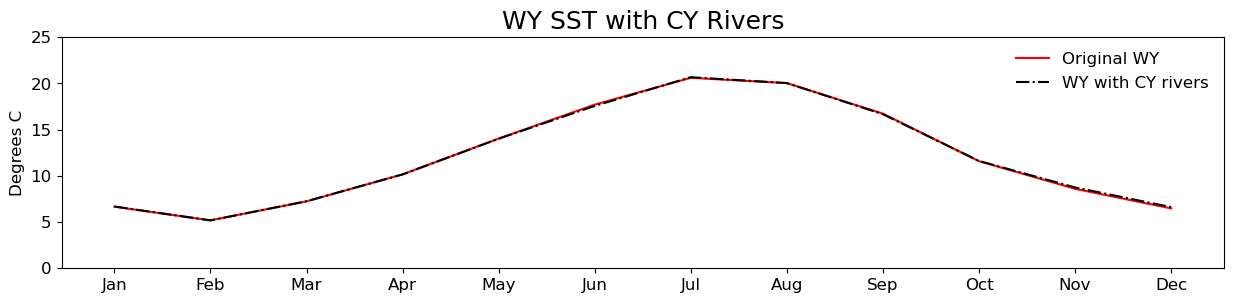

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_temp_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_temp_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY rivers')


ax.set_title('WY SST with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [8]:
monthly_array_temp_exp_slicemean[12,:]

array([ 6.68492084,  5.18552462,  7.25557932, 10.16054886, 14.0224531 ,
       17.57203394, 20.68068024, 20.043708  , 16.67098008, 11.61331057,
        8.74718019,  6.62090044])

Text(0, 0.5, 'Degrees C')

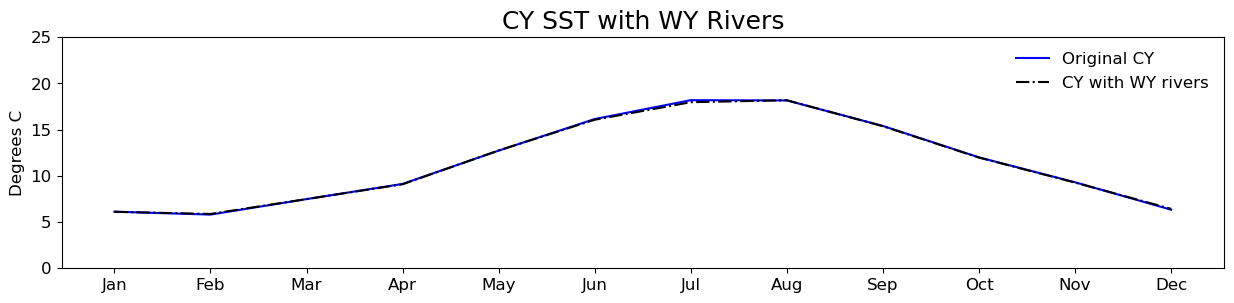

In [9]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_temp_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_temp_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY rivers')


ax.set_title('CY SST with WY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,25)
ax.set_ylabel('Degrees C')

In [10]:
monthly_array_temp_exp_slicemean[1,:]

array([ 6.11334258,  5.87921074,  7.48800428,  9.09396314, 12.75033495,
       16.07578677, 17.97372228, 18.18481324, 15.3735647 , 11.97804754,
        9.27182311,  6.43142438])

## Surface PAR

In [11]:
## PAR data for original years

monthly_array_PAR_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 original temp      

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


### 2019 original               

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_slice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [12]:
monthly_array_PAR_slice[monthly_array_PAR_slice == 0 ] = np.nan
monthly_array_PAR_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_slicemean))

(14, 12)


/tmp/ipykernel_3223455/2771304440.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_PAR_slice, axis = 2),axis = 2)


In [13]:
# PAR data for experiments 1 and 2

monthly_array_PAR_exp_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['PAR']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

            
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_river19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)

for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_river19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)
                
###               
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)


for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/11oct19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_carp_T.nc') as ds:
            q = ds.PAR.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_PAR_exp_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['PAR']:
                data[var].append(ds.PAR.isel(deptht=0, **slc).values)



In [14]:
monthly_array_PAR_exp_slice[monthly_array_PAR_exp_slice == 0 ] = np.nan
monthly_array_PAR_exp_slicemean = \
np.nanmean(np.nanmean(monthly_array_PAR_exp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_PAR_exp_slicemean))

(14, 12)


/tmp/ipykernel_3223455/178454329.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_PAR_exp_slice, axis = 2),axis = 2)


Text(0, 0.5, 'uE/m$^{2}$/s')

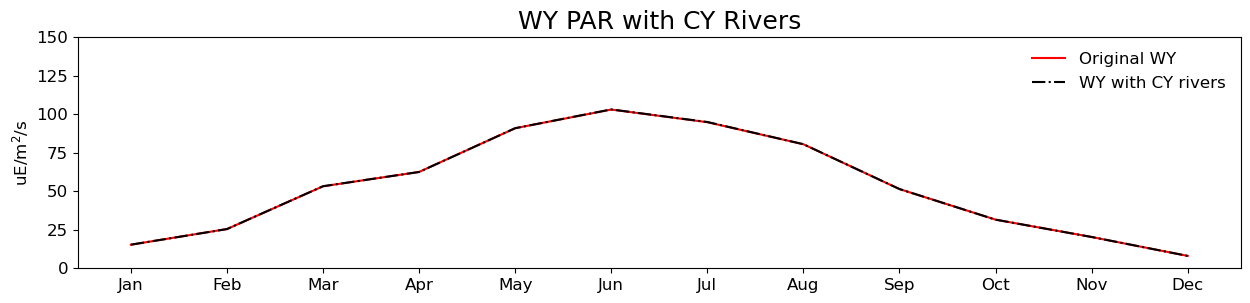

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_PAR_slicemean[12,:],color='r',linestyle='-',label='Original WY')
ax.plot(xticks, monthly_array_PAR_exp_slicemean[12,:],color='k',linestyle='-.',label='WY with CY rivers')


ax.set_title('WY PAR with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,150)
ax.set_ylabel('uE/m$^{2}$/s')

In [16]:
monthly_array_PAR_exp_slicemean[12,:]

array([ 15.32141178,  25.46487863,  53.28121643,  62.53450945,
        90.96772924, 103.14297376,  94.98511739,  80.55321234,
        51.44989112,  31.57708017,  20.31491912,   8.03466877])

Text(0, 0.5, 'uE/m$^{2}$/s')

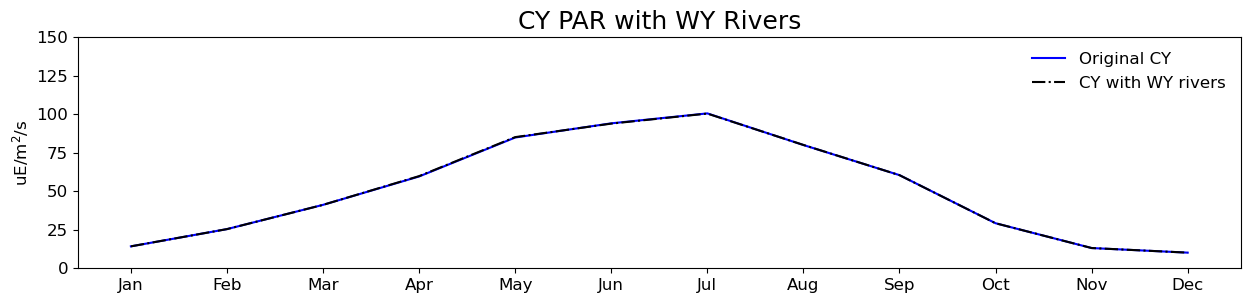

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_PAR_slicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_PAR_exp_slicemean[1,:],color='k',linestyle='-.',label='CY with WY rivers')


ax.set_title('CY PAR with WY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,150)
ax.set_ylabel('uE/m$^{2}$/s')

In [18]:
monthly_array_PAR_exp_slicemean[1,:]

array([ 14.23691735,  25.43099464,  41.17917068,  59.83653825,
        85.16592265,  93.9387496 , 100.45387598,  80.0917271 ,
        60.47075832,  29.24338572,  13.14281766,  10.14914155])

## Halocline Strength

In [19]:

# Halocline Strength data for original years


monthly_array_halocline_depth_orig_SSslice = np.zeros([14,12,50,50])
monthly_array_halocline_strength_orig_SSslice = np.zeros([14,12,50,50])

mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2007, 2021), ['halocline','strength']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_orig_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

          

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
         # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_orig_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_orig_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [20]:
monthly_array_halocline_strength_orig_SSslice[monthly_array_halocline_strength_orig_SSslice == 0 ] = np.nan
monthly_array_halocline_strength_orig_SSslicemean = \
np.nanmean(np.nanmean(monthly_array_halocline_strength_orig_SSslice, axis = 2),axis = 2)
print(np.shape(monthly_array_halocline_strength_orig_SSslicemean))

(14, 12)


/tmp/ipykernel_3223455/1288103633.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_halocline_strength_orig_SSslice, axis = 2),axis = 2)


In [21]:
# Data for Experiments 1 and 2

monthly_array_halocline_depth_SSslice = np.zeros([14,12,50,50])
monthly_array_halocline_strength_SSslice = np.zeros([14,12,50,50])

mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2007, 2021), ['halocline','strength']

# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_river19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
            
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_river19/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
 
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
            
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/11oct19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            
            sal=ds.vosaline.isel(**slc).values
                      
             #get the gradient in salinity
            sal_grad = np.zeros_like(sal)

            for i in range(0, (np.shape(sal_grad)[1]-1)):
                sal_grad[:,i,:,:] =(sal[:,i,:,:]-sal[:,i+1,:,:])/(depth[:,i,:,:]-depth[:,i+1,:,:])

            #print(sal_grad)

            loc_max = np.argmax(sal_grad,axis=1)
            depths=np.tile(depth,[np.shape(sal)[0],1,1,1])
            h1=np.take_along_axis(depths, np.expand_dims(loc_max, axis=1), axis=1)
            h2=np.take_along_axis(depths, np.expand_dims(loc_max+1, axis=1), axis=1)
            
            sals=np.tile(sal,[np.shape(sal)[0],1,1,1])
            s1=np.take_along_axis(sals, np.expand_dims(loc_max, axis=1), axis=1)
            s2=np.take_along_axis(sals, np.expand_dims(loc_max+1, axis=1), axis=1)

            #halocline is halfway between the two cells
            halocline = 0.5*(h1+h2)
            strength = (s2-s1)/(h2-h1)
        
            data['halocline'].append(halocline)
            data['strength'].append(strength)
                        
            monthly_array_halocline_depth_SSslice[year-2007,month-1,:,:]=halocline
            monthly_array_halocline_strength_SSslice[year-2007,month-1,:,:]=strength
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [22]:
monthly_array_halocline_strength_SSslice[monthly_array_halocline_strength_SSslice == 0 ] = np.nan
monthly_array_halocline_strength_SSslicemean = \
np.nanmean(np.nanmean(monthly_array_halocline_strength_SSslice, axis = 2),axis = 2)
print(np.shape(monthly_array_halocline_strength_SSslicemean))

(14, 12)


/tmp/ipykernel_3223455/3661973807.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_halocline_strength_SSslice, axis = 2),axis = 2)


Text(0, 0.5, 'g/kg m$^{-1}$')

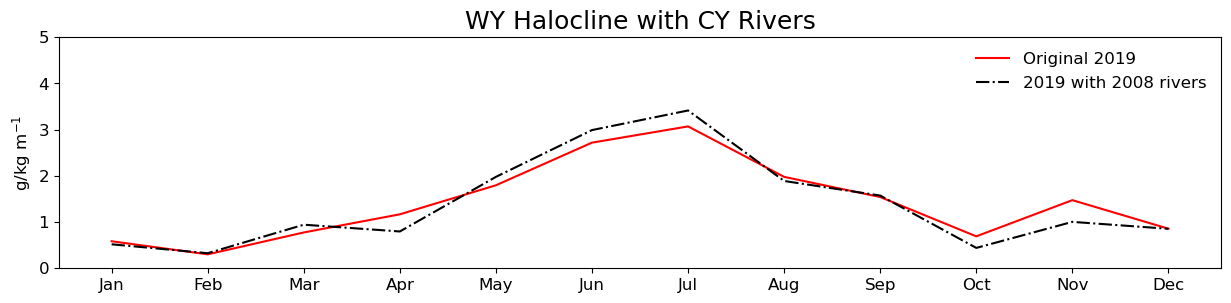

In [23]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_halocline_strength_orig_SSslicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_halocline_strength_SSslicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 rivers')


ax.set_title('WY Halocline with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,5)
ax.set_ylabel('g/kg m$^{-1}$')

In [24]:
monthly_array_halocline_strength_SSslicemean[12,:]

array([0.51926909, 0.32624015, 0.94315948, 0.79663785, 1.97864725,
       2.99150912, 3.4154679 , 1.8896247 , 1.57378358, 0.44097102,
       1.00447982, 0.8545834 ])

Text(0, 0.5, 'g/kg m$^{-1}$')

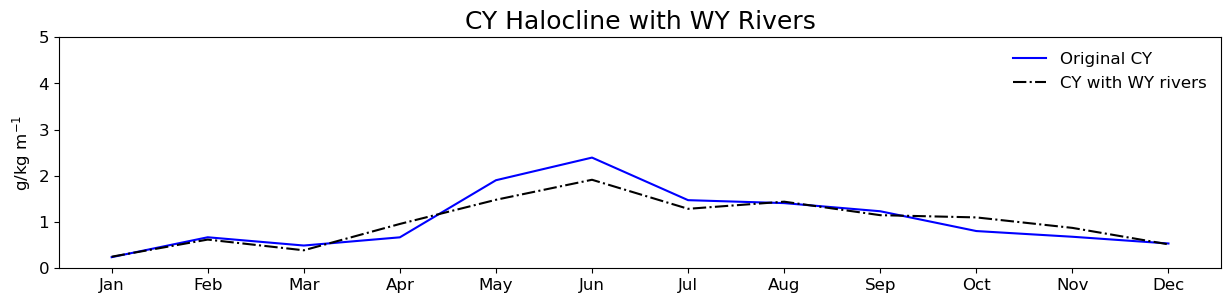

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_halocline_strength_orig_SSslicemean[1,:],color='b',linestyle='-',label='Original CY')
ax.plot(xticks, monthly_array_halocline_strength_SSslicemean[1,:],color='k',linestyle='-.',label='CY with WY rivers')


ax.set_title('CY Halocline with WY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,5)
ax.set_ylabel('g/kg m$^{-1}$')

In [26]:
### Depth-averaged Nutrients (0-10m)

In [27]:

### Nitrate data for original cold and warm years


monthly_array_nitrate_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

          

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [28]:
monthly_array_nitrate_orig_slice[monthly_array_nitrate_orig_slice == 0 ] = np.nan
monthly_array_nitrate_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_orig_slicemean))

(14, 12)


/tmp/ipykernel_3223455/3312634990.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_nitrate_orig_slice, axis = 2),axis = 2)


In [29]:

### Silicon data for original cold and warm years

monthly_array_silicon_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['silicon']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

   
 ### 
## Experimental Year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        


       



In [30]:
monthly_array_silicon_orig_slice[monthly_array_silicon_orig_slice == 0 ] = np.nan
monthly_array_silicon_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_silicon_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_silicon_orig_slicemean))

(14, 12)


/tmp/ipykernel_3223455/241793216.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_silicon_orig_slice, axis = 2),axis = 2)


In [31]:

### Nitrate data for Experiments 1 and 2

monthly_array_nitrate_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['nitrate']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_river19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_river19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                


# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/11oct19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_nitrate_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['nitrate']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

     
        # # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [32]:
monthly_array_nitrate_depthint_slice[monthly_array_nitrate_depthint_slice == 0 ] = np.nan
monthly_array_nitrate_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_nitrate_depthint_slicemean))

(14, 12)


/tmp/ipykernel_3223455/231329215.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_nitrate_depthint_slice, axis = 2),axis = 2)


In [33]:

### Silicon data for Experiments 1 and 2


monthly_array_silicon_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 10),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['silicon']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


        
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_river19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

 # Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_river19/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/11oct19_river08/SalishSea_1m_{datestr}_{datestr}'
        
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data
            q2 = q[0,:,:]
            monthly_array_silicon_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['silicon']:
                data[var].append((ds[var].isel(deptht=slice(None, 10),**slc)*e3t*tmask).sum(axis=1)/((e3t*tmask).sum(axis=1)).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
         

# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [34]:
monthly_array_silicon_depthint_slice[monthly_array_silicon_depthint_slice == 0 ] = np.nan
monthly_array_silicon_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_silicon_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_silicon_depthint_slicemean))

(14, 12)


/tmp/ipykernel_3223455/3737416097.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_silicon_depthint_slice, axis = 2),axis = 2)


Text(0, 0.5, 'mmol N m$^{-3}$')

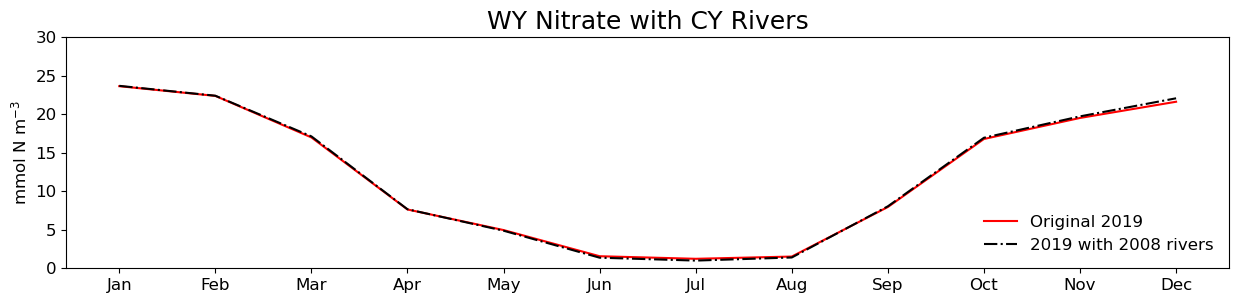

In [35]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_nitrate_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_nitrate_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 rivers')


ax.set_title('WY Nitrate with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,30)
ax.set_ylabel('mmol N m$^{-3}$')

In [36]:
monthly_array_nitrate_orig_slicemean[12,:]

array([23.64834195, 22.38691698, 16.99383033,  7.63730902,  4.96273598,
        1.56547187,  1.23107567,  1.5230891 ,  7.95614177, 16.79074658,
       19.52305174, 21.62759183])

In [37]:
monthly_array_nitrate_depthint_slicemean[12,:]

array([23.69352626, 22.4096068 , 17.12926893,  7.66441735,  4.87999298,
        1.37387281,  0.99858407,  1.40141887,  8.04740459, 16.94915656,
       19.72782593, 22.07596841])

Text(0, 0.5, 'mmol Si m$^{-3}$')

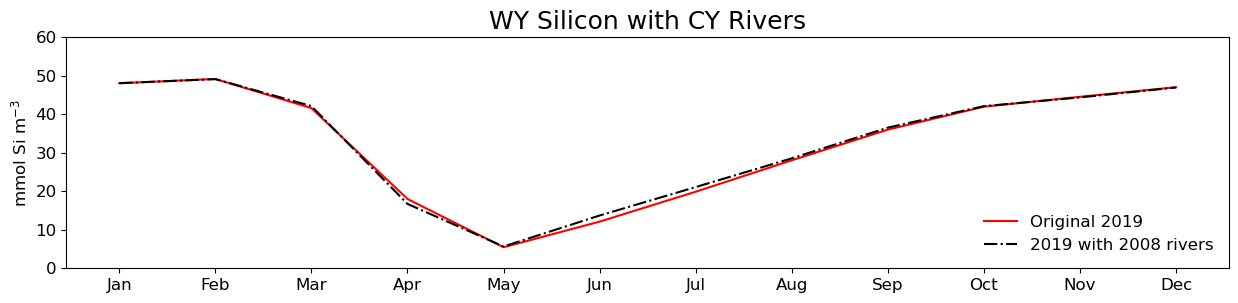

In [38]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_silicon_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_silicon_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 rivers')


ax.set_title('WY Silicon with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,60)
ax.set_ylabel('mmol Si m$^{-3}$')

In [39]:
monthly_array_silicon_orig_slicemean[12,:]

array([48.06238141, 49.17238747, 41.59249494, 18.0018168 ,  5.46358173,
       12.1107789 , 19.87997362, 28.03714477, 36.00806573, 41.96864256,
       44.54149611, 47.0336623 ])

In [40]:
monthly_array_silicon_depthint_slicemean[12,:]

array([48.07595093, 49.1295625 , 42.12771314, 16.72076613,  5.66290843,
       13.70585083, 21.09441445, 28.55469541, 36.52751148, 42.10990644,
       44.38558449, 46.95928795])

Text(0, 0.5, 'mmol N m$^{-3}$')

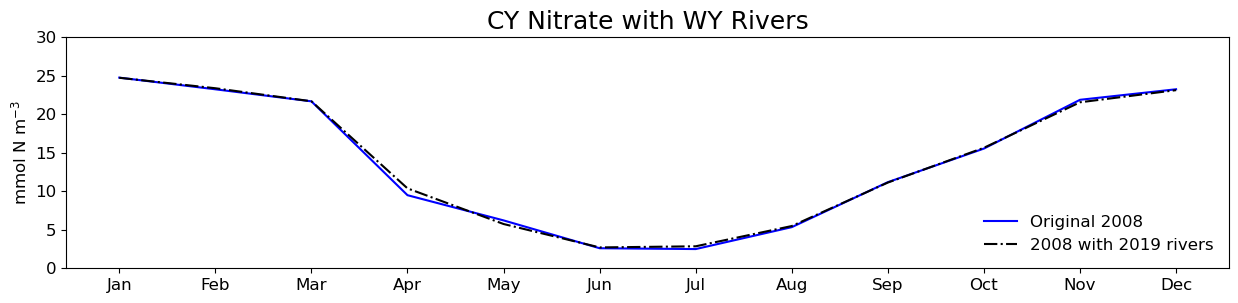

In [41]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_nitrate_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_nitrate_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 rivers')


ax.set_title('CY Nitrate with WY Rivers',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,30)
ax.set_ylabel('mmol N m$^{-3}$')

In [42]:
monthly_array_nitrate_depthint_slicemean[1,:]

array([24.74045154, 23.38186726, 21.69020601, 10.37701929,  5.74879707,
        2.70849594,  2.85380337,  5.48641413, 11.13281657, 15.64983911,
       21.55740055, 23.13323183])

Text(0, 0.5, 'mmol Si m$^{-3}$')

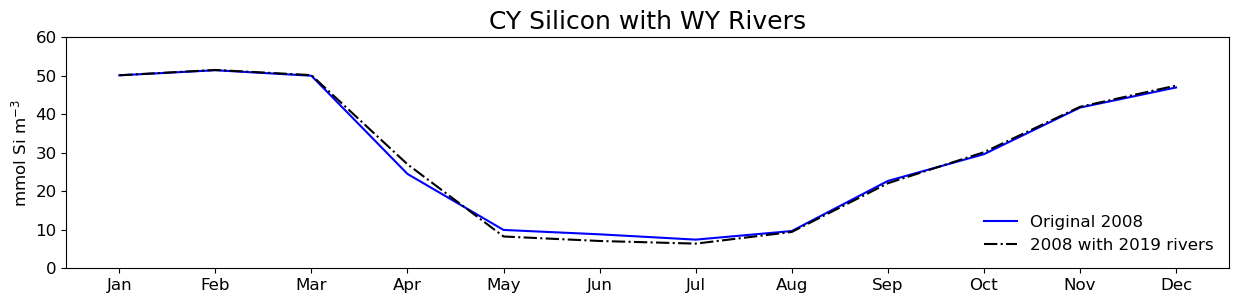

In [43]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_silicon_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_silicon_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 rivers')


ax.set_title('CY Silicon with WY Rivers',fontsize=18)
ax.legend(frameon=False,loc=4)
ax.set_ylim(0,60)
ax.set_ylabel('mmol Si m$^{-3}$')

In [44]:
monthly_array_silicon_depthint_slicemean[1,:]

array([50.13663507, 51.513422  , 50.16886923, 27.00665494,  8.25802888,
        7.09006067,  6.40147506,  9.4362604 , 22.08336301, 30.14843401,
       41.93311685, 47.46025761])

## Depth-integrated 0-100 m Diatoms

In [45]:

### Diatom data for original years

monthly_array_diatoms_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 using higher temperature threshold       
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

                
### 2019 using higher temperature threshold                
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)




In [46]:
monthly_array_diatoms_orig_slice[monthly_array_diatoms_orig_slice == 0 ] = np.nan
monthly_array_diatoms_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_orig_slicemean))

(14, 12)


/tmp/ipykernel_3223455/3403781678.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)


In [47]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan08_river19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul08_river19/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)


        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/11oct19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [48]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


/tmp/ipykernel_3223455/2320522072.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)


Text(0, 0.5, 'mmol N m$^{-2}$')

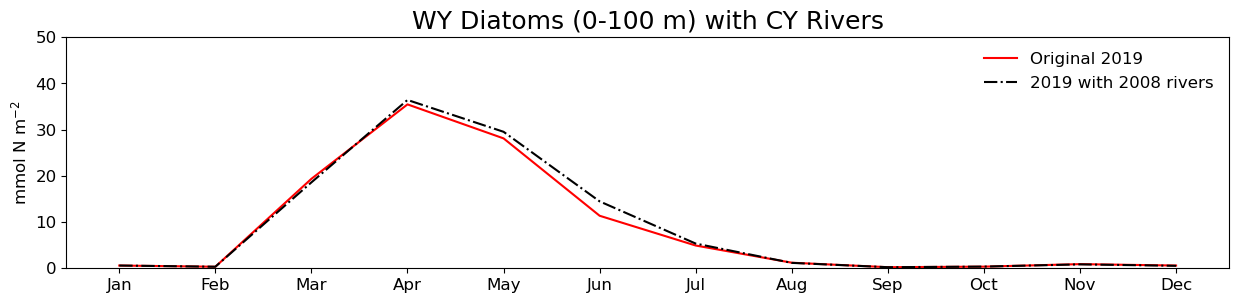

In [49]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 rivers')


ax.set_title('WY Diatoms (0-100 m) with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')

Text(0, 0.5, 'mmol N m$^{-2}$')

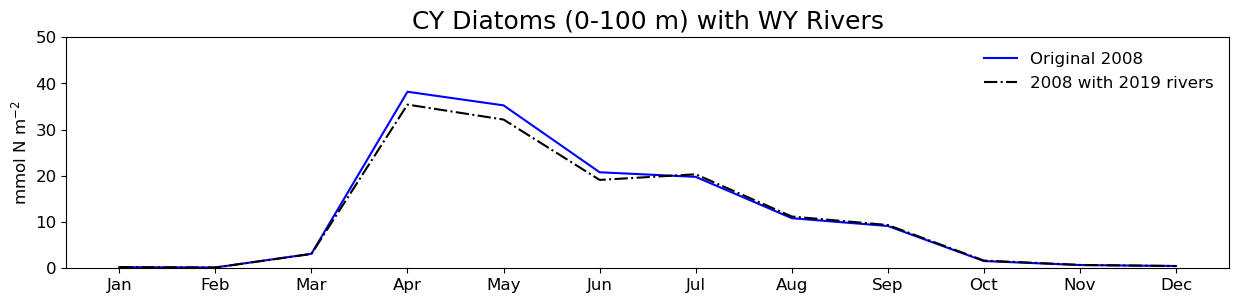

In [50]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[1,:],color='b',linestyle='-',label='Original 2008')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[1,:],color='k',linestyle='-.',label='2008 with 2019 rivers')


ax.set_title('CY Diatoms (0-100 m) with WY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')